In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Dataset
df = pd.read_csv('autos.csv', parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'])
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20,0,40764,2016-03-24 12:45:21


# Cleaning the Dataset

### Removing unnecessary columns

In [3]:
df['nrOfPictures'].value_counts() # There is only 1 value

0    371528
Name: nrOfPictures, dtype: int64

In [4]:
df['seller'].value_counts() # There is only 1 value

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [5]:
df['offerType'].value_counts() # There is only 1 value

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64

In [89]:
# dropping the columns
df.drop(columns= ['seller', 'offerType', 'nrOfPictures', 'dateCrawled', 'dateCreated', 'lastSeen', 'name', 'model', 'postalCode'], inplace = True)

In [7]:
# Rearranging the columns
df.insert(11, "price", df.pop("price"))

In [8]:
df

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
0,test,NaN,1993,manuell,0,150000,0,benzin,volkswagen,NaN,70435,480
1,test,coupe,2011,manuell,190,125000,5,diesel,audi,ja,66954,18300
2,test,suv,2004,automatik,163,125000,8,diesel,jeep,NaN,90480,9800
3,test,kleinwagen,2001,manuell,75,150000,6,benzin,volkswagen,nein,91074,1500
4,test,kleinwagen,2008,manuell,69,90000,7,diesel,skoda,nein,60437,3600
...,...,...,...,...,...,...,...,...,...,...,...,...
371523,test,NaN,2005,NaN,0,20000,1,NaN,sonstige_autos,NaN,39576,2200
371524,test,cabrio,2000,automatik,101,125000,3,benzin,smart,nein,26135,1199
371525,test,bus,1996,manuell,102,150000,3,diesel,volkswagen,nein,87439,9200
371526,test,kombi,2002,manuell,100,150000,6,diesel,volkswagen,NaN,40764,3400


### Missing Values

In [9]:
# Checking for Missing Values
df.isna().sum()

abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
postalCode                 0
price                      0
dtype: int64

In [11]:
# Replacing Missing Values
df['vehicleType'].fillna(df['vehicleType'].mode()[0], inplace = True)
df['gearbox'].fillna(df['gearbox'].mode()[0], inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0], inplace = True)
df['notRepairedDamage'].fillna(df['notRepairedDamage'].mode()[0], inplace = True)

In [12]:
df.isna().sum()

abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
postalCode             0
price                  0
dtype: int64

### Duplicate Values

In [13]:
# Checking for Duplicates
df.duplicated().sum()

16934

In [14]:
# Removing Duplicates
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

### Label Encoding

In [16]:
# Checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354594 entries, 0 to 371527
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   abtest               354594 non-null  object
 1   vehicleType          354594 non-null  object
 2   yearOfRegistration   354594 non-null  int64 
 3   gearbox              354594 non-null  object
 4   powerPS              354594 non-null  int64 
 5   kilometer            354594 non-null  int64 
 6   monthOfRegistration  354594 non-null  int64 
 7   fuelType             354594 non-null  object
 8   brand                354594 non-null  object
 9   notRepairedDamage    354594 non-null  object
 10  postalCode           354594 non-null  int64 
 11  price                354594 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 35.2+ MB


In [18]:
# Converting all the columns using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['abtest'] = le.fit_transform(df['abtest'])
df['vehicleType'] = le.fit_transform(df['vehicleType'])
df['gearbox'] = le.fit_transform(df['gearbox'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['brand'] = le.fit_transform(df['brand'])
df['notRepairedDamage'] = df['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354594 entries, 0 to 371527
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   abtest               354594 non-null  int64
 1   vehicleType          354594 non-null  int64
 2   yearOfRegistration   354594 non-null  int64
 3   gearbox              354594 non-null  int64
 4   powerPS              354594 non-null  int64
 5   kilometer            354594 non-null  int64
 6   monthOfRegistration  354594 non-null  int64
 7   fuelType             354594 non-null  int64
 8   brand                354594 non-null  int64
 9   notRepairedDamage    354594 non-null  int64
 10  postalCode           354594 non-null  int64
 11  price                354594 non-null  int64
dtypes: int64(12)
memory usage: 35.2 MB


### Identifying and Handling Outliers

In [20]:
# Checking for outliers in 'price' column

<AxesSubplot:xlabel='price'>

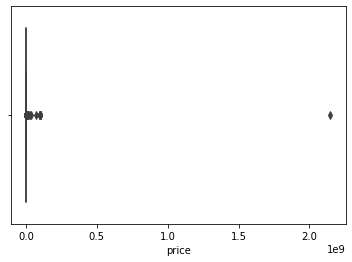

In [21]:
sns.boxplot(x = df['price'])

In [22]:
a = df['price'].quantile(q=[0.75,0.25])
a

0.75    7100.0
0.25    1100.0
Name: price, dtype: float64

In [23]:
IQR = a.iloc[0] - a.iloc[1]
IQR

6000.0

In [24]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[1]-(1.5*IQR)

In [25]:
# upper limit
upper

16100.0

In [26]:
# lower limit
lower

-7900.0

In [27]:
df.shape

(354594, 12)

In [28]:
#rounding 16,000 to 20,000
df[df['price'] > 20000]

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
56,1,3,2014,0,306,30000,7,1,2,0,10435,39600
80,1,6,2010,0,204,80000,12,3,20,0,51491,20300
98,0,6,2013,0,143,40000,6,3,2,0,49356,23490
104,0,3,2012,0,303,50000,4,1,12,0,88167,22999
148,0,7,2014,0,204,40000,9,3,20,0,82131,41900
...,...,...,...,...,...,...,...,...,...,...,...,...
371435,0,6,2011,0,204,150000,2,3,2,0,50668,21499
371477,0,5,2011,0,204,150000,7,3,2,0,85376,23900
371483,0,6,2012,0,136,60000,4,3,20,0,77694,20500
371500,1,6,2014,0,150,30000,9,1,38,0,38470,20400


In [29]:
# Dropping outliers in price
a = df[df['price'] > 20000].index
df.drop(a, inplace = True)

In [30]:
df.shape

(338056, 12)

<AxesSubplot:xlabel='price'>

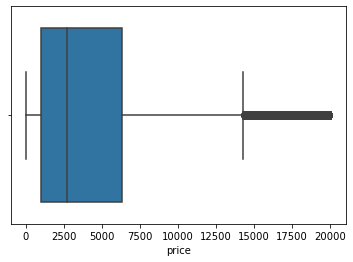

In [31]:
sns.boxplot(x = df['price'])

In [32]:
# Checking for outliers in 'yearOfRegistration' column

<AxesSubplot:xlabel='yearOfRegistration'>

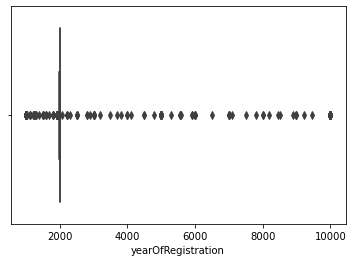

In [33]:
sns.boxplot(x = df['yearOfRegistration'])

In [34]:
a = df['yearOfRegistration'].quantile(q=[0.75,0.25])
a

0.75    2008.0
0.25    1999.0
Name: yearOfRegistration, dtype: float64

In [35]:
IQR = a.iloc[0] - a.iloc[1]
IQR

9.0

In [36]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[1]-(1.5*IQR)

In [37]:
upper

2021.5

In [38]:
lower

1985.5

In [39]:
df[df['yearOfRegistration'] < 1985]

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
7,1,6,1980,1,50,40000,7,1,38,0,19348,0
15,1,4,1910,1,0,5000,0,1,10,0,24148,450
28,1,1,1981,1,50,5000,1,1,38,0,87471,1990
39,1,1,1984,1,70,150000,8,3,20,0,22767,1500
93,0,6,1984,0,180,150000,3,1,24,0,57290,1222
...,...,...,...,...,...,...,...,...,...,...,...,...
371204,0,6,1970,1,0,150000,0,1,20,0,34123,0
371312,0,3,1981,0,136,150000,4,1,20,0,25335,8500
371441,0,3,1973,1,200,150000,6,1,2,1,74722,16500
371457,0,1,1984,0,0,70000,4,1,3,0,87600,5990


In [40]:
df[df['yearOfRegistration'] > 2019]

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
13576,0,6,5000,1,0,5000,12,1,38,0,74523,49
15894,0,6,9999,1,0,10000,0,1,33,0,32689,0
16657,1,6,3200,1,0,5000,0,1,33,0,33649,1700
18121,1,6,9999,1,0,10000,0,1,24,0,21769,700
18196,0,6,8888,1,0,10000,0,1,33,0,55262,6500
...,...,...,...,...,...,...,...,...,...,...,...,...
349671,1,6,9999,1,0,10000,0,1,2,0,32689,0
352029,0,6,7500,1,0,10000,0,1,21,0,9669,0
355280,0,6,3000,1,3000,100000,6,1,38,1,23992,50
357075,0,6,3500,1,75,5000,3,1,33,0,96465,0


In [41]:
# Dropping outliers in yearOfRegistration
a = df[df['yearOfRegistration'] > 2019].index
df.drop(a, inplace = True)
a = df[df['yearOfRegistration'] < 1985].index
df.drop(a, inplace = True)

<AxesSubplot:xlabel='yearOfRegistration'>

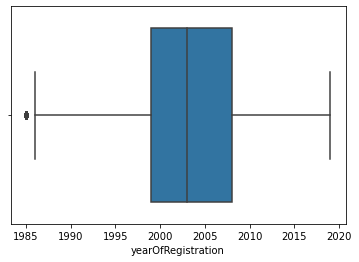

In [42]:
sns.boxplot(x = df['yearOfRegistration'])

In [43]:
df.shape

(332653, 12)

In [44]:
# Checking for outliers in 'powerPS' column 

<AxesSubplot:xlabel='powerPS'>

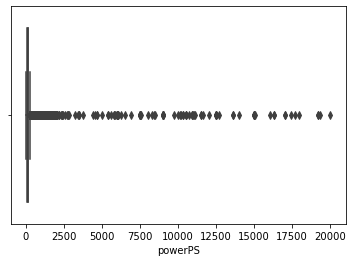

In [45]:
sns.boxplot(x = df['powerPS'])

In [46]:
a = df['powerPS'].quantile(q=[0.75,0.25])
a

0.75    141.0
0.25     69.0
Name: powerPS, dtype: float64

In [47]:
IQR = a.iloc[0] - a.iloc[1]
IQR

72.0

In [48]:
upper = a.iloc[0]+(1.5*IQR)
lower = a.iloc[1]-(1.5*IQR)

In [49]:
upper

249.0

In [50]:
lower

-39.0

In [51]:
df[df['powerPS'] > 250]

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,postalCode,price
41,0,6,2002,0,306,150000,4,1,20,0,33649,7500
60,0,7,1994,1,286,150000,11,1,33,0,53721,1
117,1,6,2002,1,265,150000,3,1,38,0,56759,6300
129,0,6,1995,0,286,150000,12,1,2,1,77866,1800
177,1,2,2006,1,305,50000,7,1,10,0,38350,19750
...,...,...,...,...,...,...,...,...,...,...,...,...
371346,0,3,2007,1,264,80000,6,1,24,0,27283,14000
371414,1,0,1994,1,1103,150000,0,1,2,0,56235,399
371461,0,5,2008,0,269,150000,7,3,1,0,61440,16999
371494,0,6,2004,0,445,125000,0,1,2,0,4107,11500


In [52]:
# Dropping outliers in powerPS
a = df[df['powerPS'] > 250].index
df.drop(a, inplace = True)

<AxesSubplot:xlabel='powerPS'>

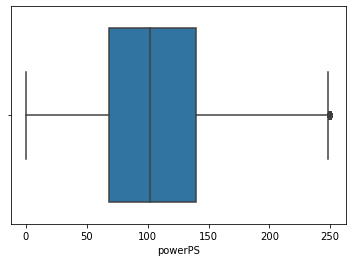

In [53]:
sns.boxplot(x = df['powerPS'])

In [54]:
df.shape

(325721, 12)

# Visualization

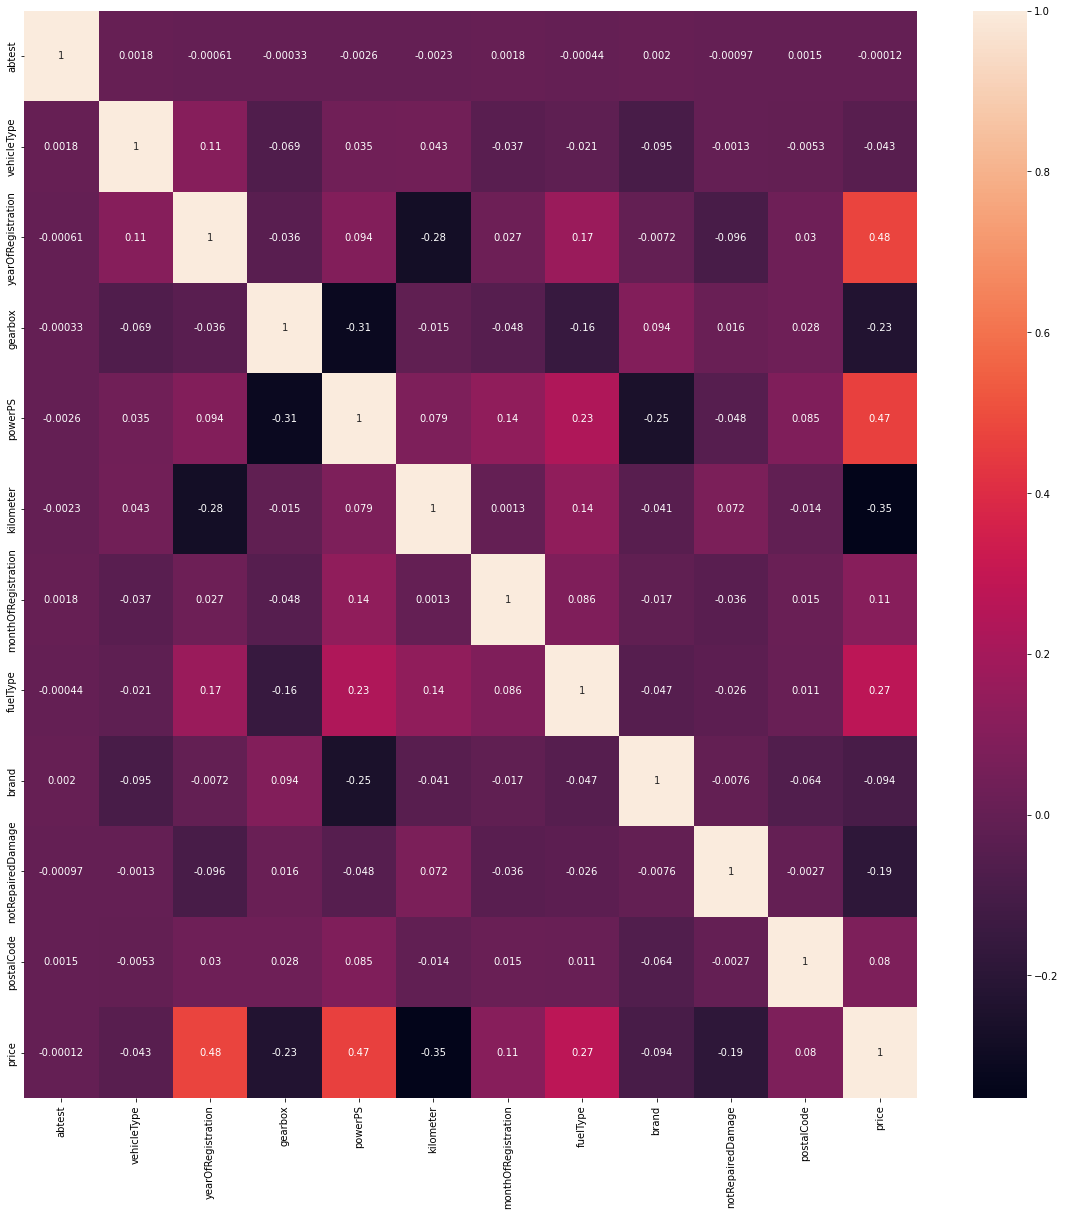

In [55]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [56]:
# sns.pairplot(df)
# plt.show()

# Splitting the Data

In [57]:
# Splitting x and y variables
x = df.drop(columns = 'price')
y = df['price']

In [58]:
# Splitting into test and train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Building Models

In [59]:
# Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
# Lasso Regression

In [62]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(x_train, y_train)

Lasso()

In [63]:
# Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

Ridge()

In [65]:
# KNN

In [66]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [67]:
# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)

DecisionTreeRegressor()

In [69]:
# Random Forest

In [70]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [71]:
from xgboost import XGBRegressor
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [72]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor()
grad.fit(x_train, y_train)

GradientBoostingRegressor()

In [91]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(x_train, y_train)

Learning rate set to 0.098605
0:	learn: 4089.6745888	total: 16.2ms	remaining: 16.2s
1:	learn: 3849.3335003	total: 27.5ms	remaining: 13.7s
2:	learn: 3638.1170075	total: 38.5ms	remaining: 12.8s
3:	learn: 3442.7564615	total: 49.6ms	remaining: 12.4s
4:	learn: 3271.9088942	total: 60.8ms	remaining: 12.1s
5:	learn: 3129.2652170	total: 72.2ms	remaining: 12s
6:	learn: 3001.1104538	total: 83.4ms	remaining: 11.8s
7:	learn: 2894.0790175	total: 94.8ms	remaining: 11.7s
8:	learn: 2795.4779887	total: 106ms	remaining: 11.7s
9:	learn: 2706.6087910	total: 118ms	remaining: 11.7s
10:	learn: 2630.0180816	total: 130ms	remaining: 11.7s
11:	learn: 2559.5898780	total: 142ms	remaining: 11.7s
12:	learn: 2502.0833288	total: 154ms	remaining: 11.7s
13:	learn: 2448.2575832	total: 165ms	remaining: 11.6s
14:	learn: 2403.5933651	total: 175ms	remaining: 11.5s
15:	learn: 2360.1102180	total: 187ms	remaining: 11.5s
16:	learn: 2324.2259420	total: 199ms	remaining: 11.5s
17:	learn: 2291.2736102	total: 213ms	remaining: 11.6s
18

153:	learn: 1795.9651170	total: 1.82s	remaining: 10s
154:	learn: 1794.9331173	total: 1.84s	remaining: 10.1s
155:	learn: 1794.4183400	total: 1.86s	remaining: 10.1s
156:	learn: 1793.8419637	total: 1.88s	remaining: 10.1s
157:	learn: 1793.2120796	total: 1.9s	remaining: 10.1s
158:	learn: 1792.8168194	total: 1.91s	remaining: 10.1s
159:	learn: 1792.4743399	total: 1.93s	remaining: 10.1s
160:	learn: 1791.8218212	total: 1.95s	remaining: 10.2s
161:	learn: 1791.0919355	total: 1.97s	remaining: 10.2s
162:	learn: 1790.6846373	total: 1.98s	remaining: 10.2s
163:	learn: 1789.8810668	total: 1.99s	remaining: 10.2s
164:	learn: 1789.5275334	total: 2s	remaining: 10.1s
165:	learn: 1788.8227853	total: 2.01s	remaining: 10.1s
166:	learn: 1787.9450890	total: 2.02s	remaining: 10.1s
167:	learn: 1787.4533321	total: 2.04s	remaining: 10.1s
168:	learn: 1786.9079720	total: 2.05s	remaining: 10.1s
169:	learn: 1786.3443684	total: 2.06s	remaining: 10.1s
170:	learn: 1786.0349942	total: 2.08s	remaining: 10.1s
171:	learn: 1785

308:	learn: 1732.5516874	total: 3.65s	remaining: 8.17s
309:	learn: 1732.3920701	total: 3.67s	remaining: 8.17s
310:	learn: 1732.2893879	total: 3.69s	remaining: 8.17s
311:	learn: 1732.1439243	total: 3.7s	remaining: 8.17s
312:	learn: 1731.7050529	total: 3.72s	remaining: 8.17s
313:	learn: 1731.4139781	total: 3.74s	remaining: 8.18s
314:	learn: 1731.1929502	total: 3.76s	remaining: 8.18s
315:	learn: 1730.6630717	total: 3.78s	remaining: 8.19s
316:	learn: 1730.5157160	total: 3.8s	remaining: 8.19s
317:	learn: 1730.1987693	total: 3.82s	remaining: 8.19s
318:	learn: 1730.0379135	total: 3.84s	remaining: 8.19s
319:	learn: 1729.6487478	total: 3.86s	remaining: 8.19s
320:	learn: 1729.3355503	total: 3.88s	remaining: 8.2s
321:	learn: 1729.1378920	total: 3.89s	remaining: 8.19s
322:	learn: 1728.9908832	total: 3.91s	remaining: 8.19s
323:	learn: 1728.7426467	total: 3.92s	remaining: 8.19s
324:	learn: 1728.5019740	total: 3.94s	remaining: 8.19s
325:	learn: 1728.1734280	total: 3.96s	remaining: 8.19s
326:	learn: 1

469:	learn: 1697.8452963	total: 5.67s	remaining: 6.39s
470:	learn: 1697.6251858	total: 5.68s	remaining: 6.38s
471:	learn: 1697.3892666	total: 5.69s	remaining: 6.37s
472:	learn: 1697.1487294	total: 5.71s	remaining: 6.36s
473:	learn: 1696.9878443	total: 5.72s	remaining: 6.34s
474:	learn: 1696.8028588	total: 5.73s	remaining: 6.33s
475:	learn: 1696.6745338	total: 5.74s	remaining: 6.32s
476:	learn: 1696.5221680	total: 5.75s	remaining: 6.31s
477:	learn: 1696.3632573	total: 5.76s	remaining: 6.29s
478:	learn: 1696.2373826	total: 5.77s	remaining: 6.28s
479:	learn: 1696.1229067	total: 5.78s	remaining: 6.26s
480:	learn: 1695.9417959	total: 5.79s	remaining: 6.25s
481:	learn: 1695.7707753	total: 5.8s	remaining: 6.24s
482:	learn: 1695.5370682	total: 5.82s	remaining: 6.23s
483:	learn: 1695.4280760	total: 5.83s	remaining: 6.21s
484:	learn: 1695.3378394	total: 5.84s	remaining: 6.2s
485:	learn: 1695.1626901	total: 5.85s	remaining: 6.19s
486:	learn: 1694.9408743	total: 5.86s	remaining: 6.17s
487:	learn: 

632:	learn: 1672.1662500	total: 7.51s	remaining: 4.36s
633:	learn: 1672.0900041	total: 7.53s	remaining: 4.34s
634:	learn: 1671.9952579	total: 7.54s	remaining: 4.33s
635:	learn: 1671.9259541	total: 7.55s	remaining: 4.32s
636:	learn: 1671.8229520	total: 7.56s	remaining: 4.31s
637:	learn: 1671.6217165	total: 7.57s	remaining: 4.3s
638:	learn: 1671.4667306	total: 7.58s	remaining: 4.28s
639:	learn: 1671.2497661	total: 7.6s	remaining: 4.27s
640:	learn: 1671.1142042	total: 7.61s	remaining: 4.26s
641:	learn: 1670.9378672	total: 7.62s	remaining: 4.25s
642:	learn: 1670.8307030	total: 7.63s	remaining: 4.24s
643:	learn: 1670.7160147	total: 7.64s	remaining: 4.22s
644:	learn: 1670.5391998	total: 7.65s	remaining: 4.21s
645:	learn: 1670.4521473	total: 7.66s	remaining: 4.2s
646:	learn: 1670.2936459	total: 7.67s	remaining: 4.18s
647:	learn: 1670.0830423	total: 7.68s	remaining: 4.17s
648:	learn: 1669.9512558	total: 7.69s	remaining: 4.16s
649:	learn: 1669.8636193	total: 7.7s	remaining: 4.15s
650:	learn: 16

792:	learn: 1652.6595063	total: 9.33s	remaining: 2.44s
793:	learn: 1652.5541540	total: 9.34s	remaining: 2.42s
794:	learn: 1652.4744579	total: 9.35s	remaining: 2.41s
795:	learn: 1652.3946258	total: 9.37s	remaining: 2.4s
796:	learn: 1652.2887578	total: 9.38s	remaining: 2.39s
797:	learn: 1652.2085651	total: 9.39s	remaining: 2.38s
798:	learn: 1652.0722460	total: 9.4s	remaining: 2.36s
799:	learn: 1651.9589326	total: 9.41s	remaining: 2.35s
800:	learn: 1651.8981397	total: 9.42s	remaining: 2.34s
801:	learn: 1651.8042102	total: 9.43s	remaining: 2.33s
802:	learn: 1651.7309181	total: 9.44s	remaining: 2.32s
803:	learn: 1651.6362291	total: 9.45s	remaining: 2.3s
804:	learn: 1651.4981249	total: 9.46s	remaining: 2.29s
805:	learn: 1651.4034252	total: 9.47s	remaining: 2.28s
806:	learn: 1651.3116120	total: 9.48s	remaining: 2.27s
807:	learn: 1651.2152838	total: 9.49s	remaining: 2.25s
808:	learn: 1651.1330560	total: 9.5s	remaining: 2.24s
809:	learn: 1651.0284667	total: 9.51s	remaining: 2.23s
810:	learn: 16

957:	learn: 1636.8262936	total: 11.1s	remaining: 489ms
958:	learn: 1636.7502814	total: 11.2s	remaining: 477ms
959:	learn: 1636.6269382	total: 11.2s	remaining: 466ms
960:	learn: 1636.5560580	total: 11.2s	remaining: 454ms
961:	learn: 1636.4516487	total: 11.2s	remaining: 443ms
962:	learn: 1636.3709861	total: 11.2s	remaining: 431ms
963:	learn: 1636.3019843	total: 11.2s	remaining: 419ms
964:	learn: 1636.2243327	total: 11.2s	remaining: 408ms
965:	learn: 1636.1217294	total: 11.3s	remaining: 396ms
966:	learn: 1636.0725035	total: 11.3s	remaining: 385ms
967:	learn: 1635.9971418	total: 11.3s	remaining: 373ms
968:	learn: 1635.9066570	total: 11.3s	remaining: 361ms
969:	learn: 1635.8023944	total: 11.3s	remaining: 350ms
970:	learn: 1635.6812739	total: 11.3s	remaining: 338ms
971:	learn: 1635.4338767	total: 11.3s	remaining: 327ms
972:	learn: 1635.3080915	total: 11.3s	remaining: 315ms
973:	learn: 1635.2074841	total: 11.4s	remaining: 303ms
974:	learn: 1635.1336158	total: 11.4s	remaining: 292ms
975:	learn

# Checking the Metrics of the models

In [75]:
# Linear Regression
acc_lr = lr.score(x_test, y_test)*100

In [76]:
# Lasso Regression
acc_lasso = lasso.score(x_test, y_test)*100

In [77]:
# Ridge Regression
acc_ridge = ridge.score(x_test, y_test)*100

In [78]:
# K Nearest Neighbour
acc_knn = knn.score(x_test, y_test)*100

In [79]:
# Decision Tree
acc_dt = DT.score(x_test, y_test)*100

In [80]:
# Random Forest
acc_rf = RF.score(x_test, y_test)*100

In [81]:
# XG Boost
acc_xg = xg.score(x_test, y_test)*100

In [82]:
# ADA Boost
acc_ada = ada.score(x_test, y_test)*100

In [83]:
# Gradient Boost
acc_grad = grad.score(x_test, y_test)*100

In [92]:
# CAT Boost
acc_cat = cat.score(x_test, y_test)*100

In [93]:
models = pd.DataFrame(
    {'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression',
               'KNN', 'Decision Tree', 'Random Forest', 'XG Boost', 
               'ADA Boost', 'Gradient Boost', 'Cat Boost'],
     
     'Score': [acc_lr, acc_lasso, acc_ridge, acc_knn, acc_dt, 
               acc_rf, acc_xg, acc_ada, acc_grad, acc_cat]})

In [94]:
models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Cat Boost,85.268496
1,Random Forest,85.235740
2,XG Boost,85.122814
3,Gradient Boost,80.391037
4,Decision Tree,71.673355
5,ADA Boost,54.955773
6,Lasso Regression,53.059354
7,Ridge Regression,53.059138
8,Linear Regression,53.059137
9,KNN,46.150431


# Saving the Model

In [95]:
import pickle
pickle.dump(cat, open('Cat Boost.pkl', 'wb'))

In [90]:
df

,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,price
0,1,6,1993,1,0,150000,0,1,38,0,480
1,1,3,2011,1,190,125000,5,3,1,1,18300
2,1,7,2004,0,163,125000,8,3,14,0,9800
3,1,4,2001,1,75,150000,6,1,38,0,1500
4,1,4,2008,1,69,90000,7,3,31,0,3600
...,...,...,...,...,...,...,...,...,...,...,...
371522,0,6,2005,1,0,150000,7,1,22,1,0
371523,1,6,2005,1,0,20000,1,1,33,0,2200
371524,1,2,2000,0,101,125000,3,1,32,0,1199
371525,1,1,1996,1,102,150000,3,3,38,0,9200
